<center><h1>ML Virtual Lab: Ensemble Learning</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>


<p>Importing the dataset. We will be using Wine Dataset which is available on UCI Machine Learning Repository</p>

In [260]:
import pandas as pd
df_wine = pd.read_csv('wine.csv',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values

In [15]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


<h3>Splitting the dataset in 60:40 ratio(60% train, 40% test)</h3>

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.40, random_state=1)

<h2> Bagging</h2>

<p>Now we will be using Bagging ensemble technique. We will be trying different classifiers like decision tree, svm, mlp and then apply Bagging on it.</p>

<h3> Applying Bagging on Decision Tree Classifier</h3>

In [140]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, 
                        max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

In [141]:
from sklearn.metrics import accuracy_score
tree1 = tree.fit(X_train, y_train)
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.854


In [142]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.896


<h4> We get no increase in train accuracy(as it is already 100%) and get 4.2 % increase in test accuracy after applying bagging on Decision Tree Classifier.</h4>

<h4>Plotting the decision boundary</h4>

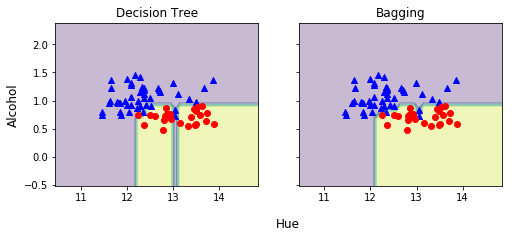

In [143]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
    X_train[y_train==0, 1],
    c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
    X_train[y_train==1, 1],
    c='red', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='Hue', ha='center', va='center', fontsize=12)
plt.show()

<h3> Applying Bagging on SVM</h3>

In [149]:
from sklearn.svm import SVC
linearsvm=SVC(kernel='linear', C=1E5)
bag = BaggingClassifier(base_estimator=svm, n_estimators=500, 
                        max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

In [150]:
linearsvm1=linearsvm.fit(X_train,y_train)
y_train_pred = linearsvm1.predict(X_train)
y_test_pred = linearsvm1.predict(X_test)
linearsvm_train = accuracy_score(y_train, y_train_pred)
linearsvm_test = accuracy_score(y_test, y_test_pred)
print('SVM train/test accuracies %.3f/%.3f'% (linearsvm_train, linearsvm_test))

SVM train/test accuracies 0.930/0.917


In [151]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Bagging train/test accuracies 0.944/0.917


<h4> We get 1.4 % increase in train accuracy and get no increase in test accuracy after applying bagging on SVM.</h4>

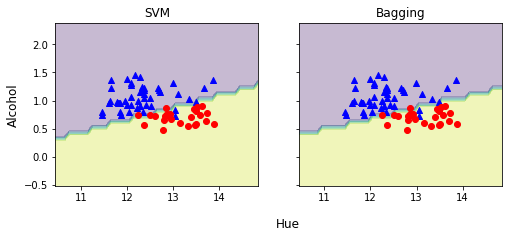

In [152]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [linearsvm, bag], ['SVM', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
    X_train[y_train==0, 1],
    c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
    X_train[y_train==1, 1],
    c='red', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='Hue', ha='center', va='center', fontsize=12)
plt.show()

<h3>Applying Bagging on MLP</h3>

In [162]:
from sklearn.neural_network import MLPClassifier

In [190]:
mlp=MLPClassifier(hidden_layer_sizes=(5),activation='relu', max_iter=50000,solver='adam',alpha=0.01,learning_rate='constant', 
                      learning_rate_init=0.001)
mlp1=mlp.fit(X_train, y_train)  
y_train_pred = mlp1.predict(X_train)
y_test_pred = mlp1.predict(X_test)
mlp_train = accuracy_score(y_train, y_train_pred)
mlp_test = accuracy_score(y_test, y_test_pred)
print('MLP train/test accuracies %.3f/%.3f'% (mlp_train, mlp_test))

MLP train/test accuracies 0.648/0.521


In [198]:
bag = BaggingClassifier(base_estimator=mlp1, n_estimators=10, 
                        max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Bagging train/test accuracies 0.789/0.854


<h4> We get 14.1 % increase in train accuracy and 33.3 % increase in test accuracy after applying bagging on MLP.</h4>

<h2>Adaboost</h2>

<p>Now we will be using boosting ensemble technique. We will be trying decision tree classifier and then apply boosting on it.</p>

<h3>Applying adaboost on Decision Tree Classifier</h3>

In [205]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.845/0.854


In [206]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.875


<h4> We get 15.55 % improvement in train accuracy and 2.1 percent increase in test accuracy after applying adaboost on Decision Tree Classifier.</h4>

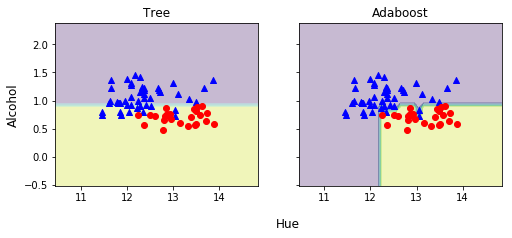

In [207]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, ada], ['Tree', 'Adaboost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
    X_train[y_train==0, 1],
    c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
    X_train[y_train==1, 1],
    c='red', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='Hue', ha='center', va='center', fontsize=12)
plt.show()

<h2>XGBoost</h2>

<p>XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.</p>

In [230]:
from xgboost import XGBClassifier

In [250]:
xgb = XGBClassifier(booster='dart', objective='')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [257]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [259]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
xgb_train = accuracy_score(y_train, y_train_pred)
xgb_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (xgb_train, xgb_test))

Bagging train/test accuracies 0.986/0.875


<h4> We get train accuracy decrease of 1.4 % but increase of 2.1 in test accuracy after applying XGBoost(comparing with decision tree classifier). We can tune hypterparameters to further increase accuracy.</h4>

<center><h1>Summary</h1></center> 

<center><h3> Bagging</h3></center>
<table>
    <tr>
        <th>Classifier</th>
        <th> % increase in Train Accuracy</th>
        <th> % increase in Test Accuracy</th>
    </tr>
    <tr>
        <td>Decision Tree Classifier</td>
        <td>0</td>
        <td>4.2</td>
    </tr>
    <tr>
        <td>Support Vector Machine</td>
        <td>1.4</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Multi-Layer Perceptron</td>
        <td>14.1</td>
        <td>33.3</td>
    </tr>
</table>
    

<center><h3>Boosting</h3></center>
<table>
    <tr>
        <th>Classifier</th>
        <th> % increase in Train Accuracy</th>
        <th> % increase in Test Accuracy</th>
    </tr>
    <tr>
        <td>Decision Tree Classifier with Adaboost</td>
        <td>15.55</td>
        <td>2.1</td>
    </tr>
    <tr>
        <td>Decision Tree Classifier with XGBoost</td>
        <td>-1.4</td>
        <td>2.1</td>
    </tr>
</table>
    
        
   